In [1]:
import skfuzzy as fuzz
from skfuzzy import control as ctrl
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Inputs

MACD = ctrl.Antecedent(np.linspace(0 ,10 ,100), 'MACD')
RSI  = ctrl.Antecedent(np.linspace(0 ,100,100), 'RSI')
SO   = ctrl.Antecedent(np.linspace(0 ,100,100), 'SO')
OBV  = ctrl.Antecedent(np.linspace(0 ,10 ,100), 'OBV')


# Output 
recommendation = ctrl.Consequent(np.linspace(0 ,30 ,100), 'REC')


/home/tinozg/anaconda3/envs/AI/lib/python3.10/site-packages/skfuzzy/control/fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


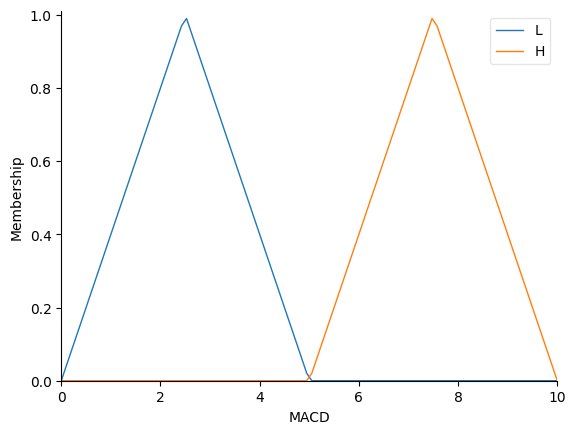

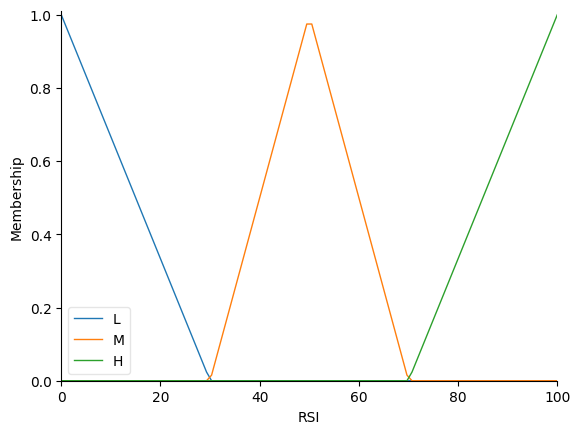

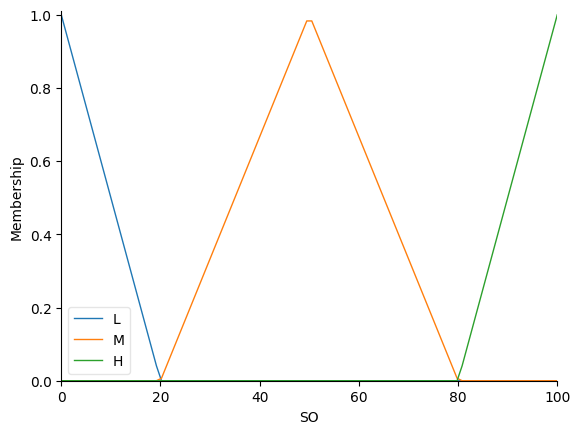

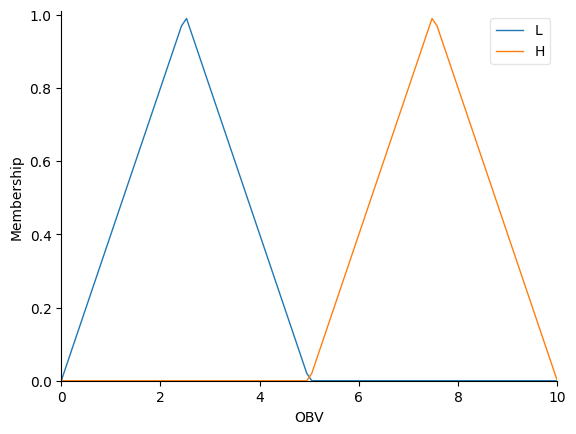

In [3]:
MACD['L'] = fuzz.trimf(MACD.universe,[0,2.5,5]) 
MACD['H'] = fuzz.trimf(MACD.universe,[5,7.5,10]) 
MACD.view()

RSI['L'] = fuzz.trimf(RSI.universe,[0,0,30]) 
RSI['M'] = fuzz.trimf(RSI.universe,[30,50,70]) 
RSI['H'] = fuzz.trimf(RSI.universe,[70,100,100]) 
RSI.view()

SO['L'] = fuzz.trimf(SO.universe,[0,0,20]) 
SO['M'] = fuzz.trimf(SO.universe,[20,50,80]) 
SO['H'] = fuzz.trimf(SO.universe,[80,100,100])
SO.view() 

OBV['L'] = fuzz.trimf(OBV.universe,[0,2.5,5]) 
OBV['H'] = fuzz.trimf(OBV.universe,[5,7.5,10]) 
OBV.view()

recommendation['sell'] = fuzz.trimf(OBV.universe,[0,5,10]) 
recommendation['hold'] = fuzz.trimf(OBV.universe,[10,15,20]) 
recommendation['buy'] = fuzz.trimf(OBV.universe,[20,25,30]) 

In [4]:
rule = []
def MakeRule(f1,f2,f3,f4,c):
    rule.append(ctrl.Rule(MACD[f1] & RSI[f2] & SO[f3] & OBV[f4], recommendation[c]))

rule.append(ctrl.Rule(MACD['H'] & RSI['L'] & SO['L'] & OBV['H'], recommendation['buy']))
rule.append(ctrl.Rule(MACD['L'] & RSI['H'] & SO['H'] & OBV['L'], recommendation['buy']))
rule.append(ctrl.Rule(MACD['H'] & RSI['M'] & SO['M'] & OBV['H'], recommendation['buy']))
rule.append(ctrl.Rule(MACD['L'] & RSI['M'] & SO['H'] & OBV['L'], recommendation['sell']))
rule.append(ctrl.Rule(RSI['L'] & SO['L'] & OBV['H'], recommendation['buy']))
rule.append(ctrl.Rule(RSI['H'] & SO['H'] & OBV['L'], recommendation['sell']))
rule.append(ctrl.Rule(MACD['L'] & RSI['H'] & SO['H'], recommendation['sell']))
rule.append(ctrl.Rule(MACD['L'] & RSI['M'] & SO['M'], recommendation['hold']))
rule.append(ctrl.Rule(MACD['H'] & RSI['M'] & SO['M'] & OBV['L'], recommendation['hold']))


In [5]:
#Control system
recommendation_control = ctrl.ControlSystem(rule)
recommendation_simulation = ctrl.ControlSystemSimulation(recommendation_control)

In [ ]:
# Compute
recommendation_simulation.inputs({'MACD': 10, 'RSI': 100, 'SO': 100, 'OBV': 10})

recommendation_simulation.compute()
print(recommendation_simulation.output['Conclusion'])

# Conclusion
recommendation_simulation.view(sim = recommendation_simulation)